<h3>Visualization</h3>

<p>This chapter is presented in three sections. The first introduces you to the general concepts
of programming visualizations with pandas, emphasizing the process of creating timeseries
charts. We will also dive into techniques to label axes and create legends, colors,
line styles, and markets.</p><p>
The second part of the chapter will then focus on the many types of data visualizations
commonly used in pandas programs and data sciences, including:</p><ul>
<li>Bar plots</li>
<li>Histograms</li>
<li>Box and whisker charts</li>
<li>Area plots</li>
<li>Scatter plots</li>
<li>Density plots</li>
<li>Scatter plot matrixes</li>
<li>Heatmaps</li>
    </ul><p>
The final section will briefly look at creating composite plots by dividing plots into
subparts and drawing multiple plots within a single graphical canvas.</p>

In [2]:
# import pandas, numpy and datetime
import numpy as np
import pandas as pd

# needed for representing dates and times
import datetime
from datetime import datetime

# Set some pandas options for controlling output
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# used for seeding random number sequences
seedval = 111111

# matplotlib
import matplotlib as mpl
# matplotlib plotting functions
import matplotlib.pyplot as plt

# we want our plots inline
%matplotlib inline

<p>The %matplotlib inline line is the statement that tells matplotlib to produce inline
graphics. This will make the resulting graphs appear either inside your IPython notebook
or IPython session.</p><p>
All examples will seed the random number generator with 111111, so that the graphs
remain the same every time they run, and so that the reader can reproduce the same charts
as in the book.</p>

<p>The pandas library itself performs data manipulation. It does not provide data visualization
capabilities itself. The visualization of data in pandas data structures is handed off by
pandas to other robust visualization libraries that are part of the Python ecosystem, most
commonly, matplotlib, which is what we will use in this chapter.</p><p>
All of the visualizations and techniques covered in this chapter can be performed without
pandas. These techniques are all available independently in matplotlib. pandas tightly
integrates with matplotlib, and by doing this, it is very simple to go directly from pandas
data to a matplotlib visualization without having to work with intermediate forms of data.</p><p>
pandas does not draw the graphs, but it will tell matplotlib how to draw graphs using
pandas data, taking care of many details on your behalf, such as automatically selecting
Series for plots, labeling axes, creating legends, and defaulting color. Therefore, you
often have to write very little code to create stunning visualizations.</p>

<h3>Creating time-series charts with .plot()</h3>

One of the most common data visualizations created, is of the time-series data. Visualizing
a time series in pandas is as simple as calling .plot() on a DataFrame or Series object.
To demonstrate, the following creates a time series representing a random walk of values
over time, akin to the movements in the price of a stock:

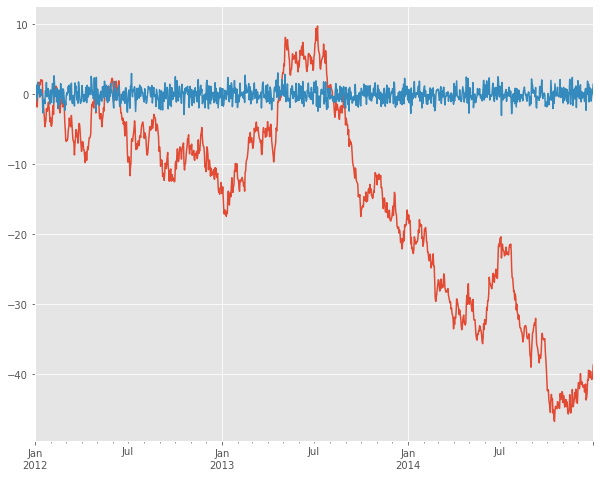

In [191]:
# generate a random walk time-series
np.random.seed(seedval)
s = pd.Series(np.random.randn(1096), index=pd.date_range('2012-01-01','2014-12-31'))
walk_ts = s.cumsum()

# this plots the walk - just that easy :)
walk_ts.plot();

plt.gcf().set_size_inches(10,8) # Set Size of Plot

s.plot();


<h4>Note</h4><p>
The ; character at the end suppresses the generation of an IPython out tag, as well as the
trace information.</p>

It is a common practice to execute the following statement to produce plots that have a
richer visual style. This sets a pandas option that makes resulting plots have a shaded
background and what is considered a slightly more pleasing style:

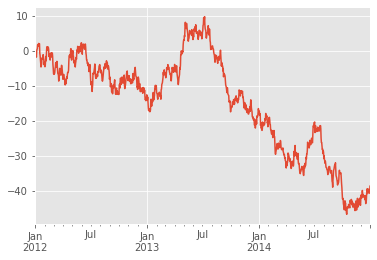

In [15]:
# tells pandas plots to use a default style
# which has a background fill
mpl.style.use('ggplot')
walk_ts.plot();

<p>The .plot() method on pandas objects is a wrapper function around the matplotlib
libraries’ plot() function. It makes plots of pandas data very easy to create. It is coded to
know how to use the data in the pandas objects to create the appropriate plots for the data,
handling many of the details of plot generation, such as selecting series, labeling, and axes
generation. In this situation, the .plot() method determines that as Series contains dates
for its index that the x axis should be formatted as dates and it selects a default color for
the data.</p><p>This example used a single series and the result would be the same using DataFrame with
a single column. As an example, the following produces the same graph with one small
difference. It has added a legend to the graph, which charts by default, generated from a
DataFrame object, will have a legend even if there is only one series of data:</p>

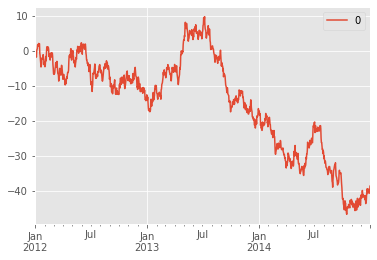

In [16]:
# a DataFrame with a single column will produce
# the same plot as plotting the Series it is created from
walk_df = pd.DataFrame(walk_ts)
walk_df.plot();

The .plot() function is smart enough to know whether DataFrame has multiple columns,
and it should create multiple lines/series in the plot and include a key for each, and also
select a distinct color for each line. This is demonstrated with the following example:

In [19]:
# generate two random walks, one in each of
# two columns in a DataFrame
np.random.seed(seedval)
df = pd.DataFrame(np.random.randn(1096, 2), index=walk_ts.index, columns=list('AB'))
walk_df = df.cumsum()
walk_df

                    A         B
2012-01-01  -1.878324  1.362367
2012-01-02  -2.804186  1.427261
2012-01-03  -3.241758  3.165368
2012-01-04  -2.750550  3.332685
2012-01-05  -1.620667  2.930017
...               ...       ...
2014-12-27 -20.952692  4.689279
2014-12-28 -20.476150  3.965521
2014-12-29 -21.250542  4.243064
2014-12-30 -19.930892  6.237730
2014-12-31 -19.016886  3.836418

[1096 rows x 2 columns]

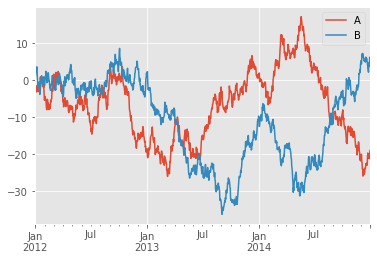

In [18]:
# plot the DataFrame, which will plot a line
# for each column, with a legend
walk_df.plot();

If you want to use one column of DataFrame as the labels on the x axis of the plot instead
of the index labels, you can use the x and y parameters to the .plot() method, giving the x
parameter the name of the column to use as the x axis and y parameter the names of the
columns to be used as data in the plot. The following recreates the random walks as
columns 'A' and 'B', creates a column 'C' with sequential values starting with 0, and
uses these values as the x axis labels and the 'A' and 'B' columns values as the two
plotted lines:

In [21]:
# copy the walk
df2 = walk_df.copy()

# add a column C which is 0 .. 1096
df2['C'] = pd.Series(np.arange(0, len(df2)), index=df2.index)

df2

                    A         B     C
2012-01-01  -1.878324  1.362367     0
2012-01-02  -2.804186  1.427261     1
2012-01-03  -3.241758  3.165368     2
2012-01-04  -2.750550  3.332685     3
2012-01-05  -1.620667  2.930017     4
...               ...       ...   ...
2014-12-27 -20.952692  4.689279  1091
2014-12-28 -20.476150  3.965521  1092
2014-12-29 -21.250542  4.243064  1093
2014-12-30 -19.930892  6.237730  1094
2014-12-31 -19.016886  3.836418  1095

[1096 rows x 3 columns]

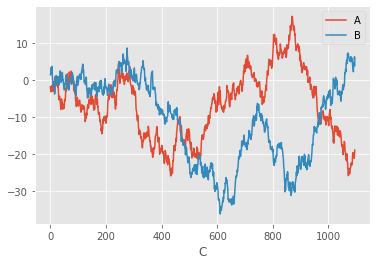

In [22]:
# instead of dates on the x axis, use the 'C' column,
# which will label the axis with 0..1000
df2.plot(x='C', y=['A', 'B']);

<h3>Adorning and styling your time-series plot</h3>

<h4>Adding a title and changing axes labels</h4>

The title of the chart can be set using the title parameter of the .plot() method. Axes
labels are not set with .plot(), but by directly using the plt.ylabel() and plt.xlabel()
functions after calling .plot():

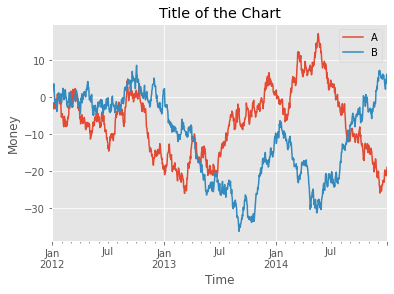

In [24]:
# create a time-series chart with a title and specific
# x and y axes labels
# the title is set in the .plot() method as a parameter
walk_df.plot(title='Title of the Chart')

# explicitly set the x and y axes labels after the .plot()
plt.xlabel('Time')
plt.ylabel('Money');

<p>The labels in this plot were added after the call to .plot(). A question that may be asked,
is that if the plot is generated in the call to .plot(), then how are they changed on the
plot?</p><p>
The answer, is that plots in matplotlib are not displayed until either .show() is called on
the plot or the code reaches the end of the execution and returns to the interactive prompt.</p><p>
At either of these points, any plot generated by plot commands will be flushed out to the
display. In this example, although .plot() is called, the plot is not generated until the
IPython notebook code section finishes completion, so the changes for labels and title are
added to the plot.</p>

<h4>Specifying the legend content and position</h4>

To change the text used in the legend (the default is the column name from DataFrame),
you can use the ax object returned from the .plot() method to modify the text using its
.legend() method. The ax object is an AxesSubplot object, which is a representation of
the elements of the plot, that can be used to change various aspects of the plot before it is
generated:

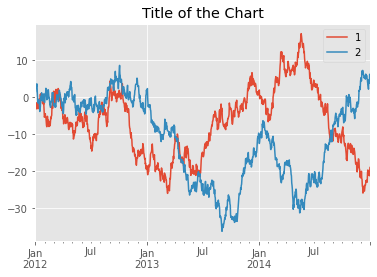

In [27]:
# change the legend items to be different
# from the names of the columns in the DataFrame
ax = walk_df.plot(title='Title of the Chart')

# this sets the legend labels
ax.legend(['1', '2']);

The location of the legend can be set using the loc parameter of the .legend() method.
By default, pandas sets the location to 'best', which tells matplotlib to examine the data
and determine the best place to put the legend. However, you can also specify any of the
following to position the legend more specifically (you can use either the string or the
numeric code):

<table>
    <tr><th>Text</th><th>Code</th></tr>
    <tr><td>'best'</td><td>0</td></tr>
<tr><td>'upper right'</td><td>1</td></tr>
<tr><td>'upper left'</td><td>2</td></tr>
<tr><td>'lower left'</td><td>3</td></tr>
<tr><td>'lower right'</td><td>4</td></tr>
<tr><td>'right'</td><td>5</td></tr>
<tr><td>'center left'</td><td>6</td></tr>
<tr><td>'center right'</td><td>7</td></tr>
<tr><td>'lower center'</td><td>8</td></tr>
<tr><td>'upper center'</td><td>9</td></tr>
<tr><td>'center'</td><td>10</td></tr>
    </table>

In our last chart, the 'best' option actually had the legend overlap the line from one of
the series. We can reposition the legend in the upper center of the chart, which will prevent
this and create a better chart of this data:

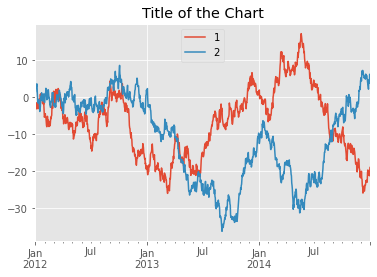

In [28]:
# change the position of the legend
ax = walk_df.plot(title='Title of the Chart')

# put the legend in the upper center of the chart
ax.legend(['1', '2'], loc='upper center');

Legends can also be turned off with the legend parameter:

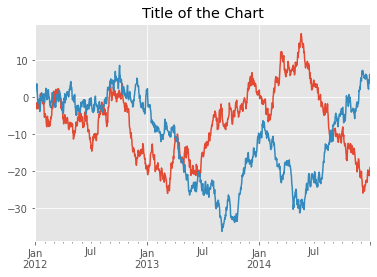

In [29]:
# omit the legend by using legend=False
walk_df.plot(title='Title of the Chart', legend=False);

<h4>Specifying line colors, styles, thickness, and markers</h4>

<p>pandas automatically sets the colors of each series on any chart. If you would like to
specify your own color, you can do so by supplying style code to the style parameter of
the plot function. pandas has a number of built-in single character code for colors, several
of which are listed here:</p>
    <ul>
<li>b: Blue</li>
<li>g: Green</li>
<li>r: Red</li>
<li>c: Cyan</li>
<li>m: Magenta</li>
<li>y: Yellow</li>
<li>k: Black</li>
<li>w: White</li>
    </ul>
    <p>It is also possible to specify the color using a hexadecimal RGB code of the #RRGGBB
format. To demonstrate both options, the following example sets the color of the first
series to green using a single digit code and the second series to red using the hexadecimal
code:</p>

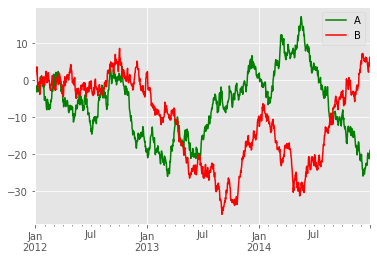

In [31]:
# change the line colors on the plot
# use character code for the first line,
# hex RGB for the second
walk_df.plot(style=['g', '#FF0000']);

<p>Line styles can be specified using a line style code. These can be used in combination with
the color style codes, following the color code. The following are examples of several
useful line style codes:</p>

<ul>
    <li>'-' = solid</li>
<li>'--' = dashed</li>
<li>':' = dotted</li>
<li>'-.' = dot-dashed</li>
<li>'.' = points</li>
    </ul><p>
The following plot demonstrates these five line styles by drawing five data series, each
with one of these styles. Notice how each style item now consists of a color symbol and a
line style code:</p>

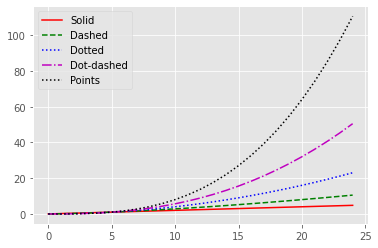

In [32]:
# show off different line styles
t = np.arange(0., 5., 0.2)
legend_labels = ['Solid', 'Dashed', 'Dotted', 'Dot-dashed', 'Points']

line_style = pd.DataFrame({0 : t, 1 : t**1.5,  2 : t**2.0, 3 : t**2.5, 4 : t**3.0})

# generate the plot, specifying color and line style for each line
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'])

# set the legend
ax.legend(legend_labels, loc='upper left');

The thickness of lines can be specified using the lw parameter of .plot(). This can be
passed a thickness for multiple lines, by passing a list of widths, or a single width that is
applied to all lines. The following redraws the graph with a line width of 3, making the
lines a little more pronounced:

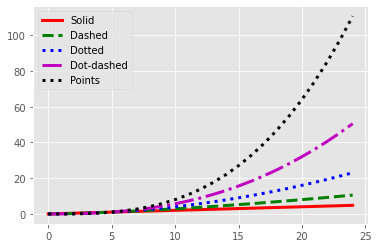

In [33]:
# regenerate the plot, specifying color and line style
# for each line and a line width of 3 for all lines
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'], lw=3)
ax.legend(legend_labels, loc='upper left');

Markers on a line can also be specified using abbreviations in the style code. There are
quite a few marker types provided and you can see them all at
http://matplotlib.org/api/markers_api.html. We will examine five of them in the following
chart by having each series use a different marker from the following: circles, stars,
triangles, diamonds, and points. The type of marker is also specified using a code at the
end of the style:

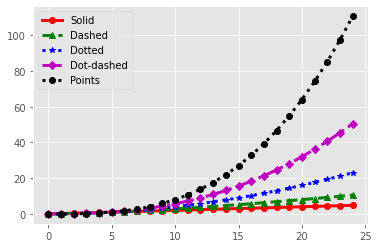

In [34]:
# redraw, adding markers to the lines
ax = line_style.plot(style=['r-o', 'g--^', 'b:*','m-.D', 'k:o'], lw=3)
ax.legend(legend_labels, loc='upper left');

<h4>Specifying tick mark locations and tick labels</h4>

<p>Every plot we have seen to this point, has used the default tick marks and labels on the
ticks that pandas decides are appropriate for the plot. These can also be customized using
various matplotlib functions.</p><p>
We will demonstrate how ticks are handled by first examining a simple DataFrame. We
can retrieve the locations of the ticks that were generated on the x axis using the
plt.xticks() method. This method returns two values, the location, and the actual labels:</p>

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

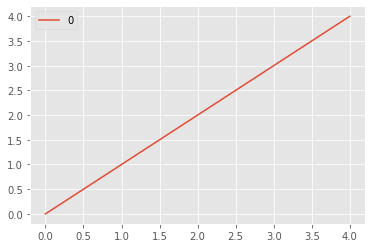

In [38]:
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
ticks, labels = plt.xticks()
ticks, labels

This array contains the locations of the ticks in units of the values along the x axis. pandas
has decided that a range of 0 through 4 (the min and max) and an interval of 0.5 is
appropriate. If we want to use other locations, we can provide these by passing them to
plt.xticks() as a list. The following demonstrates these using even integers from -1 to
5, which will both change the extents of the axis, as well as remove non integral labels:

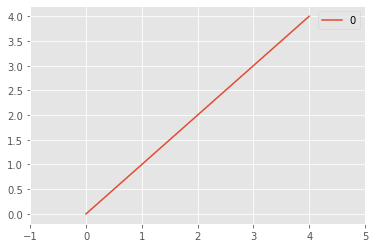

In [41]:
# resize x axis to (-1, 5), and draw ticks
# only at integer values
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
plt.xticks(np.arange(-1, 6));

Also, we can specify new labels at these locations by passing them as the second
parameter. Just as an example, we can change the y axis ticks and labels to integral values
and consecutive alpha characters using the following:

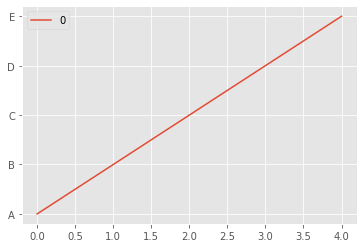

In [42]:
# rename y axis tick labels to A, B, C, D, and E
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
plt.yticks(np.arange(0, 5), list("ABCDE"));

<h4>Formatting axes tick date labels using formatters</h4>

<p>The formatting of axes labels whose underlying data types is datetime is performed using
locators and formatters. Locators control the position of the ticks, and the formatters
control the formatting of the labels.</p><p>
To facilitate locating ticks and formatting labels based on dates, matplotlib provides
several classes in maptplotlib.dates to help facilitate the process:</p>
<ul>
<li>MinuteLocator, HourLocator, DayLocator, WeekdayLocator, MonthLocator, and
YearLocator: These are specific locators coded to determine where ticks for each
    type of date field will be found on the axis</li>
<li>DateFormatter: This is a class that can be used to format date objects into labels on
    the axis</li>
    <p>
By default, the default locator and formatter are AutoDateLocator and
AutoDateFormatter, respectively. You can change these by providing different objects to
        use the appropriate methods on the specific axis object.</p>
To demonstrate, we will use a subset of the random walk data from earlier, which
represents just the data from January through February of 2014. Plotting this gives us the
following output:</p>

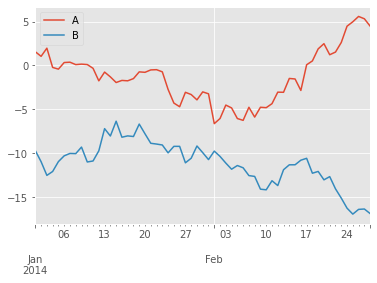

In [43]:
# plot January-February 2014 from the random walk
walk_df.loc['2014-01':'2014-02'].plot();

<p>The labels on the x axis of this plot have two series of labels, the minor and the major. The
minor labels in this plot contain the day of the month, and the major contains the year and
month (the year only for the first month). We can set locators and formatters for each of
the minor and major levels.</p><p>
This will be demonstrated by changing the minor labels to be located at the Monday of
each week and to contain the date and day of the week (right now, the chart uses weekly
and only Friday’s date—without the day name). On the major labels, we will use the
monthly location and always include both the month name and the year:</p>

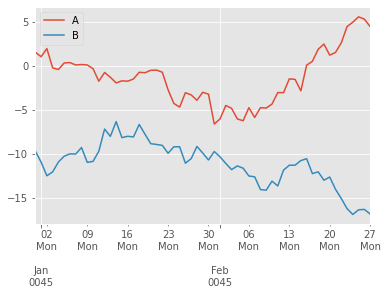

In [48]:
# this import styles helps us type less
from matplotlib.dates import WeekdayLocator,DateFormatter, MonthLocator

# plot Jan-Feb 2014
ax = walk_df.loc['2014-01':'2014-02'].plot()

# do the minor labels
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter("%d\n%a"))

# do the major labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

<p>This is almost what we wanted. However, note that the year is being reported as 45. This,
unfortunately, seems to be an issue between pandas and the matplotlib representation of
values for the year. The best reference I have on this is this following link from Stack
Overflow (http://stackoverflow.com/questions/12945971/pandas-timeseries-plot-setting-xaxis-
major-and-minor-ticks-and-labels).</p><p>
So, it appears to create a plot with custom-date-based labels, we need to avoid the pandas
.plot() and need to kick all the way down to using matplotlib. Fortunately, this is not too
hard. The following changes the code slightly and renders what we wanted:</p>

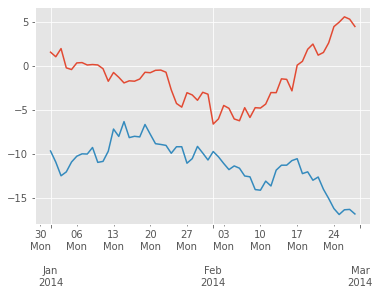

In [49]:
# this gets around the pandas / matplotlib year issue
# need to reference the subset twice, so let's make a variable
walk_subset = walk_df['2014-01':'2014-02']

# this gets the plot so we can use it, we can ignore fig
fig, ax = plt.subplots()

# inform matplotlib that we will use the following as dates
# note we need to convert the index to a pydatetime series
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

# do the minor labels
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))

# do the major labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

To add grid lines for the minor axes ticks, you can use the .grid() method of the x axis
object of the plot, the first parameter specifying the lines to use and the second parameter
specifying the minor or major set of ticks. The following replots this graph without the
major grid line and with the minor grid lines:

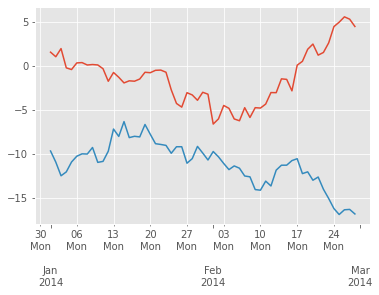

In [50]:
# this gets the plot so we can use it, we can ignore fig
fig, ax = plt.subplots()

# inform matplotlib that we will use the following as dates
# note we need to convert the index to a pydatetime series
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

# do the minor labels
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))
ax.xaxis.grid(True, "minor") # turn on minor tick grid lines
ax.xaxis.grid(False, "major") # turn off major tick grid lines

# do the major labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

The last demonstration of formatting will use only the major labels but on a weekly basis
and using a YYYY-MM-DD format. However, because these would overlap, we will specify
that they should be rotated to prevent the overlap. This is done using the
fig.autofmt_xdate() function:

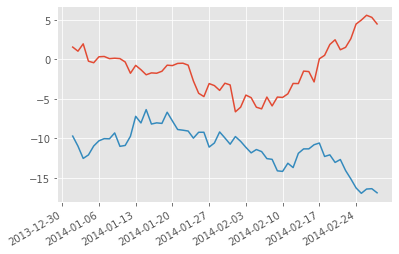

In [51]:
# this gets the plot so we can use it, we can ignore fig
fig, ax = plt.subplots()

# inform matplotlib that we will use the following as dates
# note we need to convert the index to a pydatetime series
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')
ax.xaxis.grid(True, "major") # turn off major tick grid lines

# do the major labels
ax.xaxis.set_major_locator(weekday_locator)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'));

# informs to rotate date labels
fig.autofmt_xdate();

<h3>Common plots used in statistical analyses</h3>

Having seen how to create, lay out, and annotate time-series charts, we will now look at
creating a number of charts, other than time series that are commonplace in presenting
statistical information.

<h4>Bar plots</h4>

Bar plots are useful in order to visualize the relative differences in values of non timeseries
data. Bar plots can be created using the kind='bar' parameter of the .plot()
method:

In [55]:
# make a bar plot
# create a small series of 10 random values centered at 0.0
np.random.seed(seedval)
s = pd.Series(np.random.rand(10) - 0.5)

s

0    0.076406
1   -0.105343
2    0.028186
3   -0.402140
4    0.320342
5    0.408433
6   -0.490027
7    0.205332
8    0.217187
9   -0.054677
dtype: float64

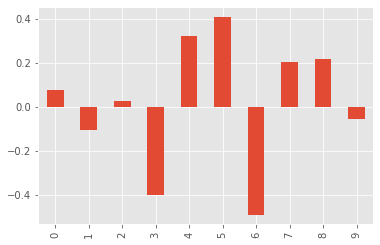

In [58]:
# plot the bar chart
s.plot(kind='bar');

If the data being plotted consists of multiple columns, a multiple series bar plot will be
created:

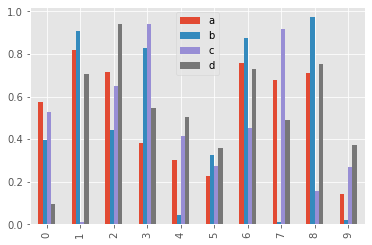

In [61]:
# draw a multiple series bar chart
# generate 4 columns of 10 random values
np.random.seed(seedval)
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

# draw the multi-series bar chart
df2.plot(kind='bar');

If you would prefer stacked bars, you can use the stacked parameter, setting it to True:

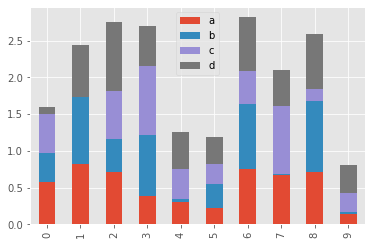

In [62]:
# horizontal stacked bar chart
df2.plot(kind='bar', stacked=True);

If you want the bars to be horizontally aligned, you can use kind='barh':

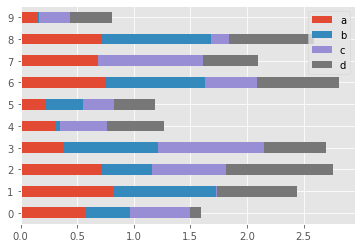

In [63]:
# horizontal stacked bar chart
df2.plot(kind='barh', stacked=True);

<h4>Histograms</h4>

Histograms are useful for visualizing distributions of data. The following shows you a
histogram of generating 1000 values from the normal distribution:

In [65]:
# create a histogram
np.random.seed(seedval)

# 1000 random numbers
dfh = pd.DataFrame(np.random.randn(1000))

dfh

            0
0   -1.878324
1    1.362367
2   -0.925862
3    0.064894
4   -0.437572
..        ...
995  0.638239
996 -0.616597
997 -0.232545
998 -0.097162
999  0.174166

[1000 rows x 1 columns]

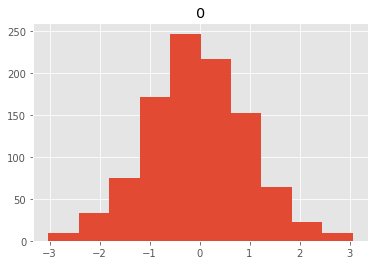

In [66]:
# draw the histogram
dfh.hist();

The resolution of a histogram can be controlled by specifying the number of bins to
allocate to the graph. The default is 10, and increasing the number of bins gives finer
detail to the histogram. The following increases the number of bins to 100:

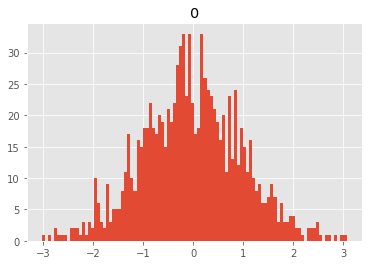

In [67]:
# histogram again, but with more bins
dfh.hist(bins = 100);

If the data has multiple series, the histogram function will automatically generate multiple
histograms, one for each series:

In [68]:
# generate a multiple histogram plot
# create DataFrame with 4 columns of 1000 random values
np.random.seed(seedval)
dfh = pd.DataFrame(np.random.randn(1000, 4),columns=['a', 'b', 'c', 'd'])

dfh

            a         b         c         d
0   -1.878324  1.362367 -0.925862  0.064894
1   -0.437572  1.738107  0.491208  0.167316
2    1.129883 -0.402668  0.073876  0.704181
3   -0.122904 -0.053066  0.106313 -2.652280
4   -0.708080 -1.101806 -0.836509 -1.350070
..        ...       ...       ...       ...
995  0.533544  1.212515  0.276475  0.190150
996 -0.831434  0.230583  0.599695  1.908485
997 -2.561038  1.027329 -0.874943  0.596250
998 -0.547905  0.005701  0.399123  0.703238
999  1.548682  0.490862  1.283276 -1.600112

[1000 rows x 4 columns]

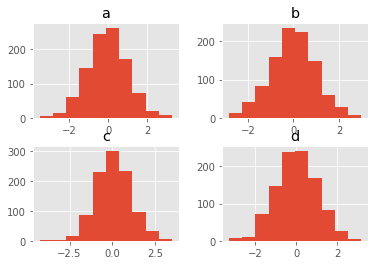

In [69]:
# draw the chart. There are four columns so pandas draws
# four historgrams
dfh.hist();

If you want to overlay multiple histograms on the same graph (to give a quick visual
difference of distribution), you can call the pyplot.hist() function multiple times before
.show() is called to render the chart:

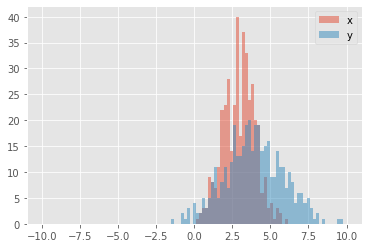

In [70]:
# directly use pyplot to overlay multiple histograms
# generate two distributions, each with a different
# mean and standard deviation
np.random.seed(seedval)
x = [np.random.normal(3,1) for _ in range(400)]
y = [np.random.normal(4,2) for _ in range(400)]

# specify the bins (-10 to 10 with 100 bins)
bins = np.linspace(-10, 10, 100)

# generate plot x using plt.hist, 50% transparent
plt.hist(x, bins, alpha=0.5, label='x')

# generate plot y using plt.hist, 50% transparent
plt.hist(y, bins, alpha=0.5, label='y')
plt.legend(loc='upper right');

<h3>Box and whisker charts</h3>

Box plots come from descriptive statistics and are a useful way of graphically depicting
the distributions of categorical data using quartiles. Each box represents the values
between the first and third quartiles of the data with a line across the box at the median.
Each whisker reaches out to demonstrate the extent to five interquartile ranges below and
above the first and third quartiles:

In [73]:
# create a box plot
# generate the series
np.random.seed(seedval)
dfb = pd.DataFrame(np.random.randn(10,5))

dfb

          0         1         2         3         4
0 -1.878324  1.362367 -0.925862  0.064894 -0.437572
1  1.738107  0.491208  0.167316  1.129883 -0.402668
2  0.073876  0.704181 -0.122904 -0.053066  0.106313
3 -2.652280 -0.708080 -1.101806 -0.836509 -1.350070
4  0.511343  0.355325  1.701553 -0.337359 -0.020597
5  0.839032  0.464744 -0.629987 -0.785945 -1.394383
6  0.620261 -1.152651 -0.103135  0.440016  1.544558
7  0.965943 -1.252908  2.642933  1.342999 -0.295199
8 -0.119870  0.465221 -1.086677  0.831922 -0.517407
9 -2.042879  0.602760  0.039995 -1.454979 -0.199571

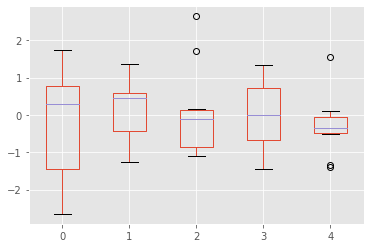

In [74]:
# generate the plot
dfb.boxplot(return_type='axes');

<h4>Area plots</h4>

<p>Area plots are used to represent cumulative totals over time, to demonstrate the change in
trends over time among related attributes. They can also be “stacked” to demonstrate
representative totals across all variables.</p><p>
Area plots are generated by specifying kind='area'. A stacked area chart is the default:</p>

In [77]:
# create a stacked area plot
# generate a 4-column data frame of random data
np.random.seed(seedval)
dfa = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

dfa

          a         b         c         d
0  0.576406  0.394657  0.528186  0.097860
1  0.820342  0.908433  0.009973  0.705332
2  0.717187  0.445323  0.650719  0.942483
3  0.382860  0.828695  0.938694  0.546024
4  0.302687  0.043013  0.414173  0.503440
5  0.226060  0.323951  0.273772  0.359828
6  0.758962  0.872668  0.454171  0.731148
7  0.677727  0.010610  0.919141  0.489711
8  0.710850  0.971763  0.154796  0.754658
9  0.143164  0.020395  0.270441  0.370609

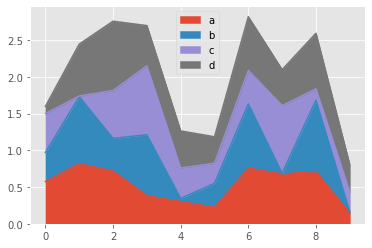

In [78]:
# create the area plot
dfa.plot(kind='area');

To produce an unstacked plot, specify stacked=False:

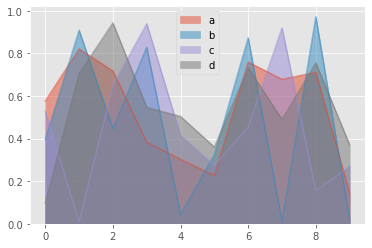

In [79]:
# do not stack the area plot
dfa.plot(kind='area', stacked=False);

By default, unstacked plots have an alpha value of 0.5, so that it is possible to see how the
data series overlaps.

<h4>Scatter plots</h4>

A scatter plot displays the correlation between a pair of variables. A scatter plot can be
created from DataFrame using .plot() and specifying kind='scatter', as well as
specifying the x and y columns from the DataFrame source:

In [85]:
# generate a scatter plot of two series of normally
# distributed random values
# we would expect this to cluster around 0,0
np.random.seed(111111)
sp_df = pd.DataFrame(np.random.randn(10000, 2),columns=['a', 'b'])
sp_df

             a         b
0    -1.878324  1.362367
1    -0.925862  0.064894
2    -0.437572  1.738107
3     0.491208  0.167316
4     1.129883 -0.402668
...        ...       ...
9995  1.558957  0.179244
9996 -0.464000 -0.769144
9997  2.200993  1.266455
9998  0.423746  1.408599
9999 -1.828961  1.215388

[10000 rows x 2 columns]

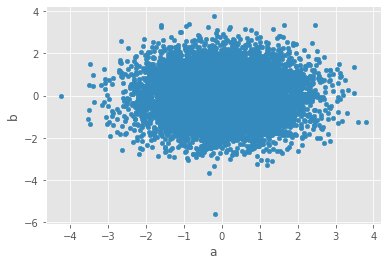

In [86]:
sp_df.plot(kind='scatter', x='a', y='b');

We can easily create more elaborate scatter plots by dropping down a little lower into
matplotlib. The following code gets Google stock data for the year of 2011 and calculates
delta in the closing price per day, and renders close versus volume as bubbles of different
sizes, derived on the size of the values in the data:

In [90]:
# get Google stock data from 1/1/2011 to 12/31/2011
import pandas_datareader.data as web
stock_data = web.DataReader("GOOGL", "yahoo",datetime(2011, 1, 1),
datetime(2011, 12, 31))

stock_data

                  High         Low        Open       Close   Volume  \
Date                                                                  
2011-01-03  303.098083  298.538544  298.538544  302.477478  4725600   
2011-01-04  303.393402  300.360352  303.113098  301.361359  3645300   
2011-01-05  305.470459  300.325317  300.335327  304.839844  5059500   
2011-01-06  309.524536  305.330322  305.645660  307.057068  4111400   
2011-01-07  309.434448  305.370361  308.263275  308.528534  4198100   
...                ...         ...         ...         ...      ...   
2011-12-23  317.657654  315.595581  316.316315  316.886902  2904400   
2011-12-27  322.567566  316.316315  316.341339  320.445435  3209500   
2011-12-28  322.822815  319.369354  321.696686  320.170166  4250100   
2011-12-29  321.821808  317.917908  321.066071  321.521515  3147600   
2011-12-30  323.703705  321.331329  321.331329  323.273285  3561000   

             Adj Close  
Date                    
2011-01-03  302.477478  
2

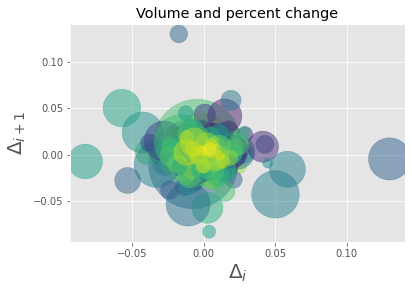

In [91]:
# % change per day
delta = np.diff(stock_data["Adj Close"])/stock_data["Adj Close"][:-1]

# this calculates size of markers
volume = (15 * stock_data.Volume[:-2] / stock_data.Volume[0])**2
close = 0.003 * stock_data.Close[:-2] / 0.003 * stock_data.Open[:-2]

# generate scatter plot
fig, ax = plt.subplots()
ax.scatter(delta[:-1], delta[1:], c=close, s=volume, alpha=0.5)

# add some labels and style
ax.set_xlabel(r'$\Delta_i$', fontsize=20)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=20)
ax.set_title('Volume and percent change')
ax.grid(True);

<h4>Density plot</h4>

You can create kernel density estimation plots using the .plot() method and setting the
kind='kde' parameter. A kernel density estimate plot, instead of being a pure empirical
representation of the data, makes an attempt and estimates the true distribution of the data,
and hence smoothes it into a continuous plot. The following generates a normal distributed
set of numbers, displays it as a histogram, and overlays the kde plot:

In [95]:
# create a kde density plot
# generate a series of 1000 random numbers
np.random.seed(seedval)
s = pd.Series(np.random.randn(1000))
s

0     -1.878324
1      1.362367
2     -0.925862
3      0.064894
4     -0.437572
         ...   
995    0.638239
996   -0.616597
997   -0.232545
998   -0.097162
999    0.174166
Length: 1000, dtype: float64

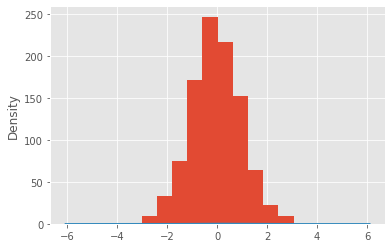

In [97]:
# generate the frequency plot
s.hist() # shows the bars
s.plot(kind='kde');

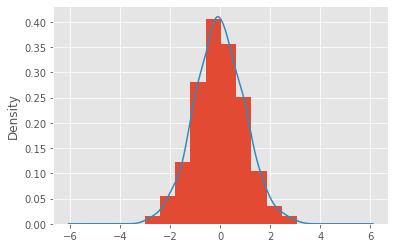

In [98]:
# generate the relative plot
s.hist(density=True) # shows the bars
s.plot(kind='kde');

<h4>The scatter plot matrix</h4>

The final composite graph we’ll look at in this chapter, is one that is provided by pandas in
its plotting tools subcomponent: the scatter plot matrix. A scatter plot matrix is a popular
way of determining whether there is a linear correlation between multiple variables. The
following creates a scatter plot matrix with random values, which then shows a scatter plot
for each combination, as well as a kde graph for each variable:

In [102]:
# create a scatter plot matrix
# import this class
from pandas.plotting import scatter_matrix

# generate DataFrame with 4 columns of 1000 random numbers
np.random.seed(111111)
df_spm = pd.DataFrame(np.random.randn(1000, 4),columns=['a', 'b', 'c', 'd'])

df_spm

            a         b         c         d
0   -1.878324  1.362367 -0.925862  0.064894
1   -0.437572  1.738107  0.491208  0.167316
2    1.129883 -0.402668  0.073876  0.704181
3   -0.122904 -0.053066  0.106313 -2.652280
4   -0.708080 -1.101806 -0.836509 -1.350070
..        ...       ...       ...       ...
995  0.533544  1.212515  0.276475  0.190150
996 -0.831434  0.230583  0.599695  1.908485
997 -2.561038  1.027329 -0.874943  0.596250
998 -0.547905  0.005701  0.399123  0.703238
999  1.548682  0.490862  1.283276 -1.600112

[1000 rows x 4 columns]

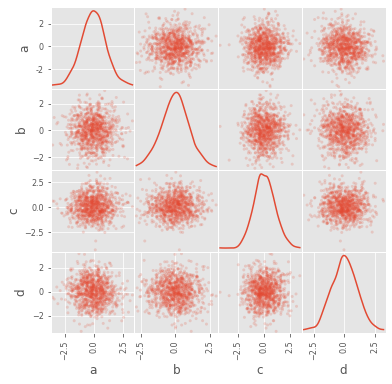

In [103]:
# create the scatter matrix
scatter_matrix(df_spm, alpha=0.2, figsize=(6, 6), diagonal='kde');

<h4>Heatmaps</h4>

<p>A heatmap is a graphical representation of data, where values within a matrix are
represented by colors. This is an effective means to show relationships of values that are
measured at the intersection of two variables, at each intersection of the rows and the
columns of the matrix. A common scenario, is to have the values in the matrix normalized
to 0.0 through 1.0 and have the intersections between a row and column represent the
correlation between the two variables. Values with less correlation (0.0) are the darkest,
and those with the highest correlation (1.0) are white.</p><p>
Heatmaps are easily created with pandas and matplotlib using the .imshow() function:</p>

In [105]:
# create a heatmap
# start with data for the heatmap
s = pd.Series([0.0, 0.1, 0.2, 0.3, 0.4], ['V', 'W', 'X', 'Y', 'Z'])

heatmap_data = pd.DataFrame({'A' : s + 0.0,
'B' : s + 0.1,
'C' : s + 0.2,
'D' : s + 0.3,
'E' : s + 0.4,
'F' : s + 0.5,
'G' : s + 0.6
})

heatmap_data

     A    B    C    D    E    F    G
V  0.0  0.1  0.2  0.3  0.4  0.5  0.6
W  0.1  0.2  0.3  0.4  0.5  0.6  0.7
X  0.2  0.3  0.4  0.5  0.6  0.7  0.8
Y  0.3  0.4  0.5  0.6  0.7  0.8  0.9
Z  0.4  0.5  0.6  0.7  0.8  0.9  1.0

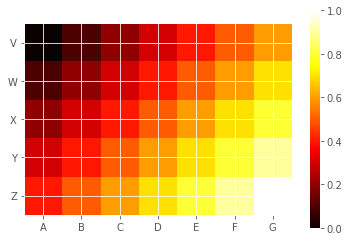

In [106]:
# generate the heatmap
plt.imshow(heatmap_data, cmap='hot', interpolation='none')
plt.colorbar() # add the scale of colors bar

# set the labels
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data)), heatmap_data.index);

<h3>Multiple plots in a single chart</h3>

<p>It is often useful to contrast data by displaying multiple plots next to each other. This is
actually quite easy to when using matplotlib.</p><p>
To draw multiple subplots on a grid, we can make multiple calls to plt.subplot2grid(),
each time passing the size of the grid the subplot is to be located on (shape=(height,
width)) and the location on the grid of the upper-left section of the subplot (loc=(row,
column)). Each call to plt.subplot2grid() returns a different AxesSubplot object that
can be used to reference the specific subplot and direct the rendering into.</p><p>
The following demonstrates this, by creating a plot with two subplots based on a two row
by one column grid (shape=(2,1)). The first subplot, referred to by ax1, is located in the
first row (loc=(0,0)), and the second, referred to as ax2, is in the second row (loc=
(1,0)):</p>

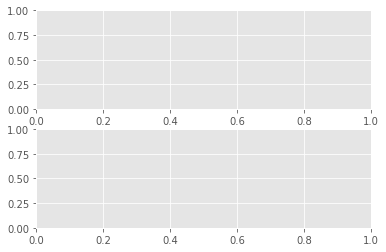

In [113]:
# create two sub plots on the new plot using a 2x1 grid
# ax1 is the upper row
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0))
# and ax2 is in the lower row
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))

<p>The subplots have been created, but we have not drawn into either yet.</p><p>
The size of any subplot can be specified using the rowspan and colspan parameters in
each call to plt.subplot2grid(). This actually feels a lot like placing content in HTML
tables.</p><p>
The following demonstrates a more complicated layout of five plots, specifying different
row and column spans for each:</p>

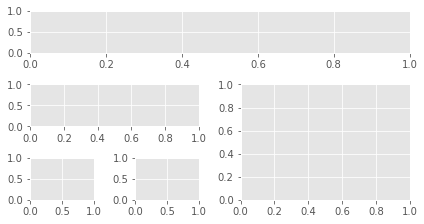

In [143]:
# layout sub plots on a 4x4 grid
# ax1 on top row, 4 columns wide
ax1 = plt.subplot2grid((4,4), (0,0), colspan=4)

# ax2 is row 2, leftmost and 2 columns wide
ax2 = plt.subplot2grid((4,4), (1,0), colspan=2)

# ax3 is 2 cols wide and 2 rows high, starting
# on second row and the third column
ax3 = plt.subplot2grid((4,4), (1,2), colspan=2, rowspan=2)

# ax4 1 high 1 wide, in row 4 column 0
ax4 = plt.subplot2grid((4,4), (2,0))

# ax4 1 high 1 wide, in row 4 column 1
ax5 = plt.subplot2grid((4,4), (2,1));

plt.tight_layout() # spaces between subplots

To draw into a specific subplot using the pandas .plot() method, you can pass the
specific axes into the plot function via the ax parameter. The following demonstrates this
by extracting each series from the random walk we created at the beginning of the chapter,
and drawing each into different subplots:

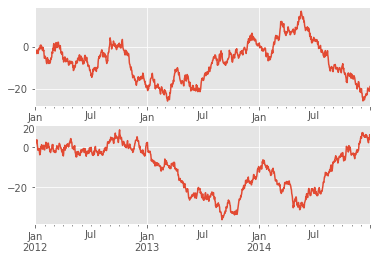

In [155]:
# demonstrating drawing into specific sub-plots
# generate a layout of 2 rows 1 column
# create the subplots, one on each row
ax5 = plt.subplot2grid((2,1), (0,0))
ax6 = plt.subplot2grid((2,1), (1,0))

# plot column 0 of walk_df into top row of the grid
walk_df['A'].plot(ax = ax5)
# and column 1 of walk_df into bottom row
walk_df['B'].plot(ax = ax6);

Using this technique, we can perform combinations of different series of data, such as a
stock close versus volume graph. Given the data we read during a previous example for
Google, the following will plot the volume versus the closing price:

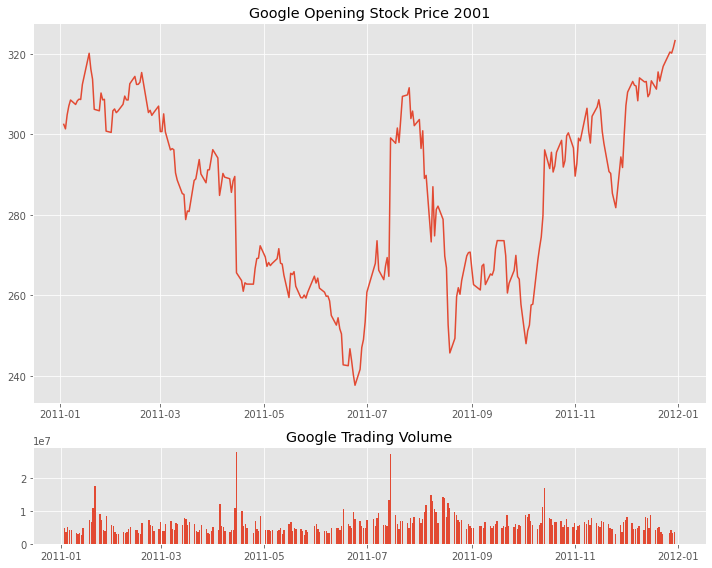

In [144]:
# draw the close on the top chart
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(stock_data.index, stock_data['Close'], label='Close')
plt.title('Google Opening Stock Price 2001')

# draw the volume chart on the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(stock_data.index, stock_data['Volume'])
plt.title('Google Trading Volume')

# set the size of the plot
plt.gcf().set_size_inches(10,8)
plt.tight_layout() # spaces between subplots